In [61]:
#! pip install networkx
#! pip install matplotlib
#! pip install numpy

In [62]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

### Question 2.1


In [63]:
# grap init
G_medium = nx.DiGraph()
G_large = nx.DiGraph()

# medium.tsv
with open('medium.tsv', 'r') as file:
    for line in file:
        source, target = line.strip().split('\t')
        G_medium.add_edge(int(source), int(target))

num_links_medium = G_medium.number_of_edges()

# large.tsv
with open('large.tsv', 'r') as file:
    for line in file:
        source, target = line.strip().split('\t')
        G_large.add_edge(int(source), int(target))

num_links_large = G_large.number_of_edges()

print("number of directed edges in mediun.tsv:", num_links_medium)
print("number of directed edges in large.tsv:", num_links_large)


number of directed edges in mediun.tsv: 16329
number of directed edges in large.tsv: 149755


### Question 2.2


In [64]:
# set of unique nodes for medium.tsv and for large.tsv
unique_nodes_medium = set()
unique_nodes_large = set()


# medium.tsv
with open('medium.tsv', 'r') as file:
    for line in file:
        source, target = line.strip().split('\t')

        unique_nodes_medium.add(source)
        unique_nodes_medium.add(target)

num_of_nodes_medium = len(unique_nodes_medium)

# large.tsv
with open('large.tsv', 'r') as file:
    for line in file:
        source, target = line.strip().split('\t')

        unique_nodes_large.add(source)
        unique_nodes_large.add(target)

num_of_nodes_large = len(unique_nodes_large)

print("Users in medium social network:", num_of_nodes_medium)
print("Users in large social network:", num_of_nodes_large)


Users in medium social network: 5895
Users in large social network: 41767


### Question 2.3


https://www.statisticshowto.com/choose-bin-sizes-statistics/ was inspired to choose bins to better visualize. But actually choosing the amount of bins was done manually.

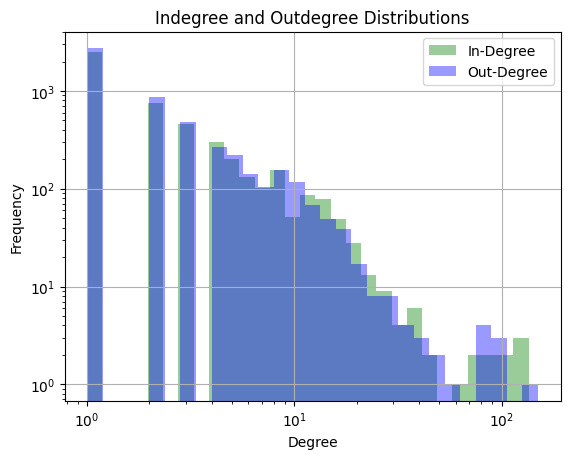

In [65]:
in_degree_medium = dict(G_medium.in_degree())
out_degree_medium = dict(G_medium.out_degree())


# bins=np.logspace used to create bins to solve issue of disporortional frequence and degrees.
plt.hist(list(in_degree_medium.values()), bins=np.logspace(0, np.log10(max(in_degree_medium.values())), 30), alpha=0.4, color='green', label='In-Degree')
plt.hist(list(out_degree_medium.values()), bins=np.logspace(0, np.log10(max(out_degree_medium.values())), 30), alpha=0.4, color='blue', label='Out-Degree')

plt.xscale('log')  # Apply logarithmic scaling to the x-axis
plt.yscale('log')  # Apply logarithmic scaling to the y-axis

plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Indegree and Outdegree Distributions')
plt.grid(True)
plt.show()


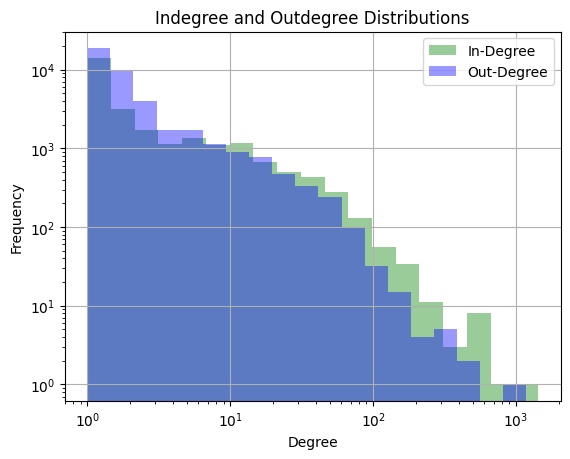

In [66]:
in_degree_large = dict(G_large.in_degree())
out_degree_large = dict(G_large.out_degree())

# bins=np.logspace used to create bins to solve issue of disporortional frequence and degrees.
plt.hist(list(in_degree_large.values()), bins=np.logspace(0, np.log10(max(in_degree_large.values())), 20), alpha=0.4, color='green', label='In-Degree')
plt.hist(list(out_degree_large.values()), bins=np.logspace(0, np.log10(max(out_degree_large.values())), 20), alpha=0.4, color='blue', label='Out-Degree')

plt.xscale('log')  # Apply logarithmic scaling to the x-axis
plt.yscale('log')  # Apply logarithmic scaling to the y-axis

plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Indegree and Outdegree Distributions')
plt.grid(True)
plt.show()


### Question 2.4

Converted tsv file to .edg

awk -F'\t' '{print $1, $2}' medium.tsv > medium.edg
awk -F'\t' '{print $1, $2}' large.tsv > large.edg

Aric A. Hagberg, Daniel A. Schult and Pieter J. Swart, “Exploring network structure, dynamics, and function using NetworkX”, in Proceedings of the 7th Python in Science Conference (SciPy2008), Gäel Varoquaux, Travis Vaught, and Jarrod Millman (Eds), (Pasadena, CA USA), pp. 11–15, Aug 2008

In [67]:
G_medium_edg = nx.read_edgelist('medium.edg', create_using=nx.DiGraph)


#SCC and WCC
SCC = list(nx.strongly_connected_components(G_medium_edg))
WCC = list(nx.weakly_connected_components(G_medium_edg))

# number of weakly connected components = nWCC
nWCC = nx.number_weakly_connected_components(G_medium_edg)

# number of strongly connected components = nSCC
nSCC = nx.number_strongly_connected_components(G_medium_edg)

# largest weakly connected components = largest_WCC
largest_WCC = max(WCC, key=len)

# largest strongly connected components = largestSCC
largestSCC = max(SCC, key=len)


# nodes and edges in WCC
nodes_lWCC = len(largest_WCC)
edges_lWCC = G_medium_edg.subgraph(largest_WCC).size()

# nodes and edges in SCC
nodes_lWCC = len(largestSCC)
edges_lWCC = G_medium_edg.subgraph(largestSCC).size()

print("medium.tsv: ")
print("Number of weakly connected components:", nWCC)
print("Number of strongly connected components:", nSCC)
print("Number of nodes in the largest weakly connected component:", nodes_lWCC)
print("Number of links in the largest weakly connected component:", edges_lWCC)
print("Number of nodes in the largest strongly connected component:", nodes_lWCC)
print("Number of links in the largest strongly connected component:", edges_lWCC)




medium.tsv: 
Number of weakly connected components: 200
Number of strongly connected components: 1804
Number of nodes in the largest weakly connected component: 3677
Number of links in the largest weakly connected component: 13166
Number of nodes in the largest strongly connected component: 3677
Number of links in the largest strongly connected component: 13166


In [68]:
G_large_edg = nx.read_edgelist('large.edg', create_using=nx.DiGraph)


SCC = list(nx.strongly_connected_components(G_large_edg))
WCC = list(nx.weakly_connected_components(G_large_edg))


nWCC = nx.number_weakly_connected_components(G_large_edg)
nSCC = nx.number_strongly_connected_components(G_large_edg)


largest_WCC = max(WCC, key=len)
largestSCC = max(SCC, key=len)


nodes_lWCC = len(largest_WCC)
edges_lWCC = G_large_edg.subgraph(largest_WCC).size()


nodes_lWCC = len(largestSCC)
edges_lWCC = G_large_edg.subgraph(largestSCC).size()

print("large.tsv :")
print("Number of weakly connected components:", nWCC)
print("Number of strongly connected components:", nSCC)
print("Number of nodes in the largest weakly connected component:", nodes_lWCC)
print("Number of links in the largest weakly connected component:", edges_lWCC)
print("Number of nodes in the largest strongly connected component:", nodes_lWCC)
print("Number of links in the largest strongly connected component:", edges_lWCC)


large.tsv :
Number of weakly connected components: 647
Number of strongly connected components: 19250
Number of nodes in the largest weakly connected component: 21226
Number of links in the largest weakly connected component: 120614
Number of nodes in the largest strongly connected component: 21226
Number of links in the largest strongly connected component: 120614


### Question 2.5

In [69]:
# built in function of networkx that does not take in account directionality (exact)

average_clustering_coefficient_medium = nx.average_clustering(G_medium_edg, count_zeros=True)
print("average clustering coefficient for medium network is: ", average_clustering_coefficient_medium)
average_clustering_coefficient_large = nx.average_clustering(G_large_edg, count_zeros=True)
print("average clustering coefficient for large network is: ", average_clustering_coefficient_large)

average clustering coefficient for medium network is:  0.16390475180145161
average clustering coefficient for large network is:  0.253891847505671


### Question 2.6

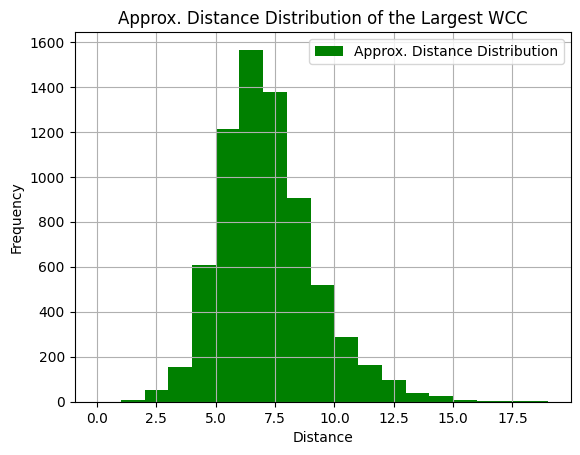

In [70]:
# Find the largest weakly connected component
largest_weakly_cc = max(nx.weakly_connected_components(G_medium_edg), key=len)
subgraph = G_medium_edg.subgraph(largest_weakly_cc)

# Number of samples to compute the approximated distribution
num_samples = 10000

# Function to sample distances for node pairs
def sample_distances(graph, num_samples):
    distances = []
    nodes_list = list(graph.nodes())  # Convert nodes to a list
    for _ in range(num_samples):
        u, v = random.sample(nodes_list, 2)
        try:
            distance = nx.shortest_path_length(graph, source=u, target=v)
            distances.append(distance)
        except nx.NetworkXNoPath:
            pass
    return distances

# Sample distances
distances = sample_distances(subgraph, num_samples)

# Plot the approximated distance distribution
plt.hist(distances, bins=range(max(distances) + 2), alpha=1, color='green', label='Approx. Distance Distribution')

plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Approx. Distance Distribution of the Largest WCC')
plt.grid(True)
plt.show()


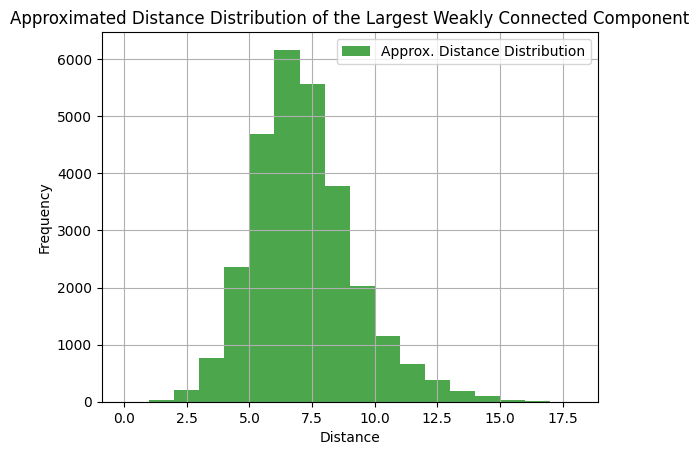

In [74]:
# Find the largest weakly connected component
largest_weakly_cc = max(nx.weakly_connected_components(G_medium_edg), key=len)
subgraph = G_medium_edg.subgraph(largest_weakly_cc)

# Number of samples to compute the approximated distribution
num_samples = 40000

# Function to sample distances for node pairs
def sample_distances(graph, num_samples):
    distances = []
    nodes_list = list(graph.nodes())  # Convert nodes to a list
    for _ in range(num_samples):
        u, v = random.sample(nodes_list, 2)
        try:
            distance = nx.shortest_path_length(graph, source=u, target=v)
            distances.append(distance)
        except nx.NetworkXNoPath:
            pass
    return distances

# Sample distances
distances = sample_distances(subgraph, num_samples)

# Plot the approximated distance distribution
plt.hist(distances, bins=range(max(distances) + 2), alpha=0.7, color='green', label='Approx. Distance Distribution')

plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Approximated Distance Distribution of the Largest Weakly Connected Component')
plt.grid(True)
plt.show()


### Question 2.7

In [72]:
# Find the largest weakly connected component
largest_weakly_cc = max(nx.weakly_connected_components(G_medium_edg), key=len)
subgraph = G_medium_edg.subgraph(largest_weakly_cc)

# Function to sample distances
def sample_distances(graph, num_samples):
    distances = []
    nodes_list = list(graph.nodes())  # Convert nodes view to a list
    for _ in range(num_samples):
        u, v = random.sample(nodes_list, 2)
        try:
            distance = nx.shortest_path_length(graph, source=u, target=v)
            distances.append(distance)
        except nx.NetworkXNoPath:
            continue
    return distances

# Number of samples for approximation
num_samples = 10000

# Sample distances
distances = sample_distances(subgraph, num_samples)

# Calculate the approximated average distance
approximated_average_distance = sum(distances) / len(distances)

# Print the result
print("Approximated Average Distance:", approximated_average_distance)


Approximated Average Distance: 6.69201030927835


In [73]:
# Find the largest weakly connected component
largest_weakly_cc = max(nx.weakly_connected_components(G_large_edg), key=len)
subgraph = G_large_edg.subgraph(largest_weakly_cc)

# Function to sample distances
def sample_distances(graph, num_samples):
    distances = []
    nodes_list = list(graph.nodes())  # Convert nodes view to a list
    for _ in range(num_samples):
        u, v = random.sample(nodes_list, 2)
        try:
            distance = nx.shortest_path_length(graph, source=u, target=v)
            distances.append(distance)
        except nx.NetworkXNoPath:
            continue
    return distances

# Number of samples for approximation
num_samples = 40000

# Sample distances
distances = sample_distances(subgraph, num_samples)

# Calculate the approximated average distance
approximated_average_distance = sum(distances) / len(distances)

# Print the result
print("Approximated Average Distance:", approximated_average_distance)


Approximated Average Distance: 6.42097040985113
